# Automated sunspots detection based on morphological operators
The following is a sequence based on morphological operators to segment sunspots on H-alpha images from the spectroheliograph of Coimbra Observatory

In [1]:
import diplib as dip

DIPlib -- a quantitative image analysis library
Version 3.1.0 (Sep 24 2021)
For more information see https://diplib.org


### 1. Reading and displaying the image 

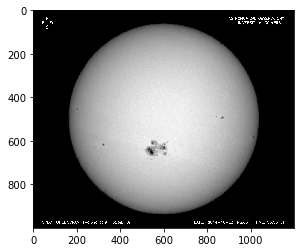

In [3]:
img = dip.ImageReadTIFF('14102303CN')
img.Show()

### 2. Creating the sun mask
Pre-processing task to filter the white text at the top and bottom of the image

In [ ]:
ope = dip.Opening(img,7)
ope.Show()

Thresholding of the image to obtain a binary mask of the sun (correspond to all non-zero pixels)

In [ ]:
bin = dip.FixedThreshold(ope,1)
bin.Show()

Contour of the mask, obtained by morphological gradient, which is superimposed to the input image 

In [ ]:
contSun = dip.MorphologicalGradientMagnitude(bin)
img_ovr_sun = dip.Overlay(img,contSun)
img_ovr_sun.Show()

### 3. Spots Segmentation (umbra + penumbra)
Computation of the black tophat 

In [ ]:
BTH = dip.Closing(ope,40) - ope
BTH.Show()

Binarization of the sun spots

In [ ]:
binBTH = dip.FixedThreshold(BTH,27)
binBTH.Show()

Filtering by opening-reconstruction, to remove very small objects (that are unlike to be sunspots)

In [ ]:
fbintBTH = dip.OpeningByReconstruction(binBTH,1)
fbintBTH.Show()

Determination of the contours of the sunspots with a half-gradient or morphological external gradient, superposed to the input image

In [ ]:
contUP = dip.Dilation(fbintBTH) - fbintBTH
contUP.Show()

In [ ]:
img_ovr_UP = dip.Overlay(img,contUP)
img_ovr_UP.Show()

Save the ouput result in a standard image format

In [ ]:
dip.ImageWriteJPEG(img_ovr_UP,'14102303CN_spots2.jpg')